# Data Exploration

The finance team wants to forecast sales in all their stores across several cities six weeks ahead of time.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Data

In [1]:
#importing Libraries
import pandas as pd
import os
import sys
import numpy as np


In [2]:
#import local libraries
#Adding scripts path
sys.path.append(os.path.abspath(os.path.join('..')))
#importing dvc_data_loader script
# from scripts.dvc_data_loader import *
from scripts.data_information import DataInfo
from scripts.data_loader import load_df_from_csv
from scripts.data_manipulation import DataManipulator
from scripts.data_cleaner import DataCleaner
from scripts.utlity_functions import convert_to_month_name
from scripts.grapher import *
from scripts.dvc_data_loader import get_dvc_data
from scripts.results_pickler import ResultPickler


In [3]:
results = ResultPickler()

In [4]:
#Loading the train data
train_df = load_df_from_csv('../data/train.csv')
train_data_info = DataInfo(train_df, deep=True)
train_data_info.get_information()
train_data_info.get_col_unique_value_count('Store')

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  uint16
 1   DayOfWeek      1017209 non-null  uint8 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  uint16
 4   Customers      1017209 non-null  uint16
 5   Open           1017209 non-null  uint8 
 6   Promo          1017209 non-null  uint8 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  uint8 
dtypes: object(2), uint16(3), uint8(4)
memory usage: 25.2+ MB
Number of unique values in column Store is: 1115


In [5]:
#Loading the store data
store_df = load_df_from_csv('../data/store.csv')
store_data_info = DataInfo(store_df, deep=True)
store_data_info.get_information()


DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   uint16 
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float32
 4   CompetitionOpenSinceMonth  761 non-null    float32
 5   CompetitionOpenSinceYear   761 non-null    float32
 6   Promo2                     1115 non-null   uint8  
 7   Promo2SinceWeek            571 non-null    float32
 8   Promo2SinceYear            571 non-null    float32
 9   PromoInterval              571 non-null    object 
dtypes: float32(5), object(3), uint16(1), uint8(1)
memory usage: 51.3+ KB


In [6]:
missing = store_data_info.get_column_based_missing_percentage()
results.add_data('missing_data',missing)
missing

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


- We wont need to use Promo2SinceWeek, Promo2SinceYear, PromoInterval Data's due to high missing percentage ...

In [7]:
#Loading the test data
test_df = load_df_from_csv('../data/test.csv')
test_data_info = DataInfo(test_df, deep=True)
test_data_info.get_information()


DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  uint16 
 1   Store          41088 non-null  uint16 
 2   DayOfWeek      41088 non-null  uint8  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float32
 5   Promo          41088 non-null  uint8  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  uint8  
dtypes: float32(1), object(2), uint16(2), uint8(3)
memory usage: 1.1+ MB


In [8]:
train_df['StateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
test_df['StateHoliday'] = test_df['StateHoliday'].apply(lambda x: 0 if x == '0' else x)

In [9]:
# We have to separate the Date to determine season
# Separating date for train_data
train_data_cleaner = DataCleaner(train_df)
test_data_cleaner = DataCleaner(test_df)

In [10]:
train_data_cleaner.change_column_to_date_type('Date')
test_data_cleaner.change_column_to_date_type('Date')

In [11]:
test_data_cleaner.df.dtypes

Id                       uint16
Store                    uint16
DayOfWeek                 uint8
Date             datetime64[ns]
Open                    float32
Promo                     uint8
StateHoliday             object
SchoolHoliday             uint8
dtype: object

In [12]:
train_data_cleaner.separate_date_column(date_column='Date')
test_data_cleaner.separate_date_column(date_column='Date')

In [13]:
# Need Joined data after this so, creating joined dataframe(train and store)
# Combining Train Data with Store Data using Store Id to match/join the instances
joined_df = DataCleaner(train_df)
joined_df = joined_df.add_columns_from_another_df_using_column(store_df, 'Store', [
                                                               'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'])

In [14]:
joined_df.head(5)

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,2015,7,31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,2015,7,31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,2015,7,31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,2015,7,31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,2015,7,31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0


In [15]:
joined_df_info = DataInfo(joined_df, deep=True)
joined_df_info.get_information()


DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  uint16        
 1   DayOfWeek                  1017209 non-null  uint8         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Year                       1017209 non-null  int64         
 4   Month                      1017209 non-null  int64         
 5   Day                        1017209 non-null  int64         
 6   Sales                      1017209 non-null  uint16        
 7   Customers                  1017209 non-null  uint16        
 8   Open                       1017209 non-null  uint8         
 9   Promo                      1017209 non-null  uint8         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday

In [16]:
train_season = DataInfo(train_data_cleaner.df)
test_season = DataInfo(test_data_cleaner.df)

In [17]:
# joined_df.to_csv('../data/store_train_joined.csv')

## 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [18]:
# day_seasonality = train_season
test_df.head(5)

,Id,Store,DayOfWeek,Date,Year,Month,Day,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,2015,9,17,1.0,1,0,0
1,2,3,4,2015-09-17,2015,9,17,1.0,1,0,0
2,3,7,4,2015-09-17,2015,9,17,1.0,1,0,0
3,4,8,4,2015-09-17,2015,9,17,1.0,1,0,0
4,5,9,4,2015-09-17,2015,9,17,1.0,1,0,0


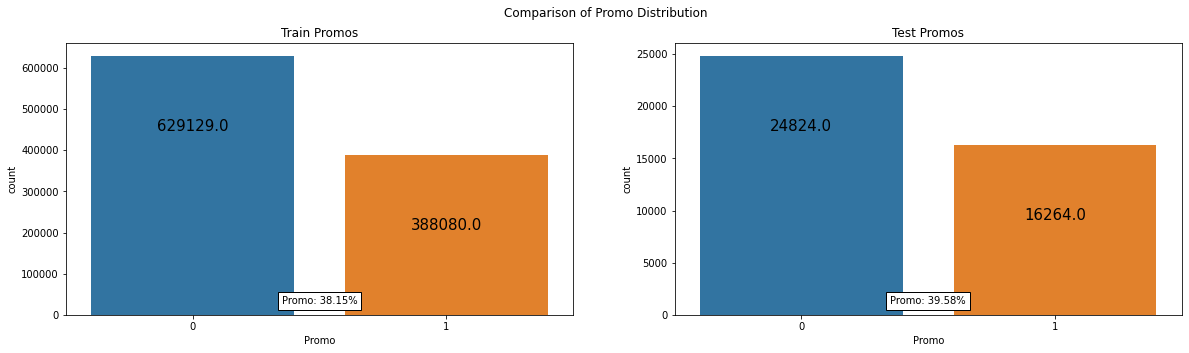

In [19]:
from matplotlib.offsetbox import AnchoredText
train_percentage = train_df['Promo'].value_counts(0)
train_percentage =  train_percentage.values[1] / (train_percentage.values[0] + train_percentage.values[1])

test_percentage = test_df['Promo'].value_counts(0)
test_percentage = test_percentage.values[1] / (test_percentage.values[0] + test_percentage.values[1])


fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison of Promo Distribution')
sns.axes_style('darkgrid')
plot1 = sns.countplot(x="Promo", data=train_df, ax=axs[0])
plot1.set_title('Train Promos')
anc1 = AnchoredText("Promo: {:.2%}".format(train_percentage), loc="lower center", frameon=True)
axs[0].add_artist(anc1)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')

plot2 = sns.countplot(x="Promo", data=test_df, ax=axs[1])
plot2.set_title('Test Promos')
anc2 = AnchoredText("Promo: {:.2%}".format(
    test_percentage), loc="lower center", frameon=True)
axs[1].add_artist(anc2)
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')

plt.savefig('../data/comppromodist.png')

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


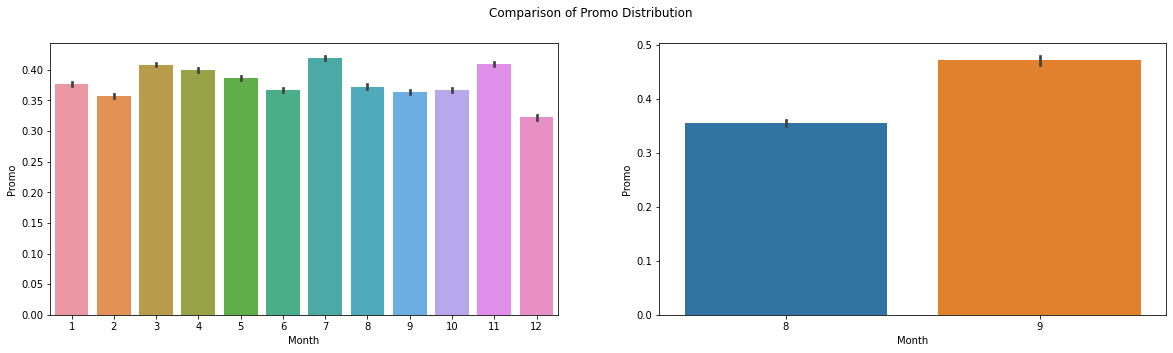

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison of Promo Distribution')
sns.barplot('Month',"Promo", data=train_df,ax=axs[0])
sns.barplot('Month',"Promo", data=test_df,ax=axs[1])

plt.savefig('../data/comppromodist2.png')

## 2. Check & compare sales behavior before, during and after holidays

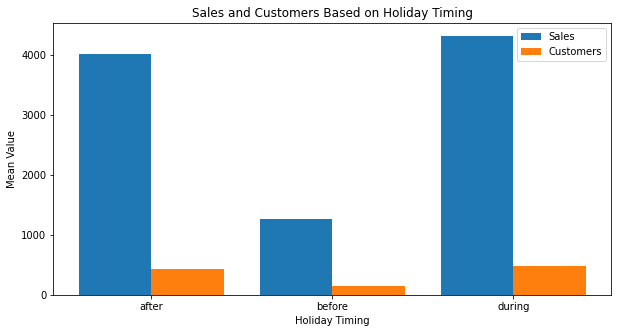

In [69]:
# Considering christmas lasts for 12 days, Easter for 50 days and public holidays for 1 day.
# And considering before and after periods to be 5 less and 5 more days before and after the holiday for christmas
# and 10 days for Easter
# And 3 days for public holiday
# get state holiday list
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list


state_holiday_list = train_df['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 50, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 12, index)
        else:
            pass

    return new_index
    
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_df.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()
plt.savefig('../data/holidaytiming.png')

## 3. Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [22]:
seasonal = train_season.get_grouped_by('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:]
seasonal

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


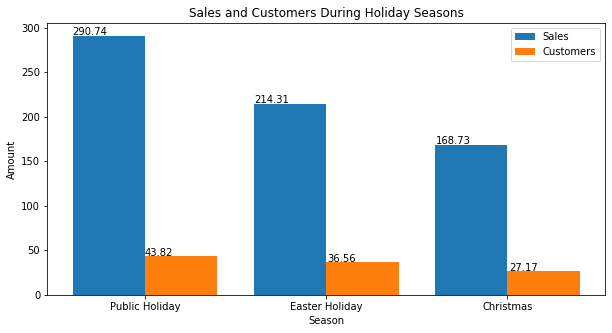

In [68]:
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))
                                       
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.legend()

plt.savefig('../data/holidayseason.png')

## 4. What can you say about the correlation between sales and number of customers?

In [24]:
sales_customer_rln = train_df.loc[:,['Sales','Customers']]
sales_cutomer_corr = sales_customer_rln.corr()
sales_cutomer_corr

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


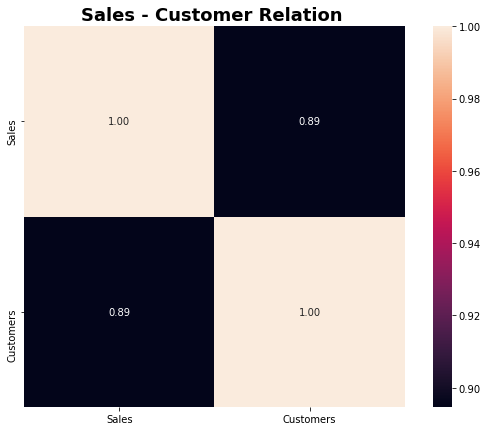

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_cutomer_corr, annot=True, square=True, fmt=".2f")
plt.title('Sales - Customer Relation ', size=18, fontweight='bold')

plt.savefig('../data/salecustrln.png')


## 5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

### How does promo affect sales?

In [26]:
sales_promo_rln = train_df.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr

,Sales,Promo
Sales,1.000000,0.452345
Promo,0.452345,1.000000


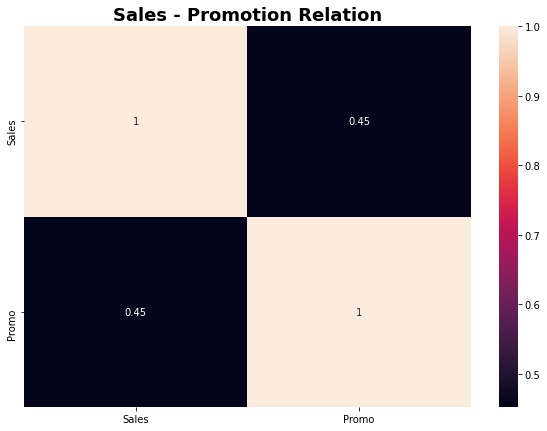

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_promo_corr, annot=True)
plt.title('Sales - Promotion Relation', size=18, fontweight='bold')

plt.savefig('../data/salepromorln.png')


### Are the promos attracting more customers?

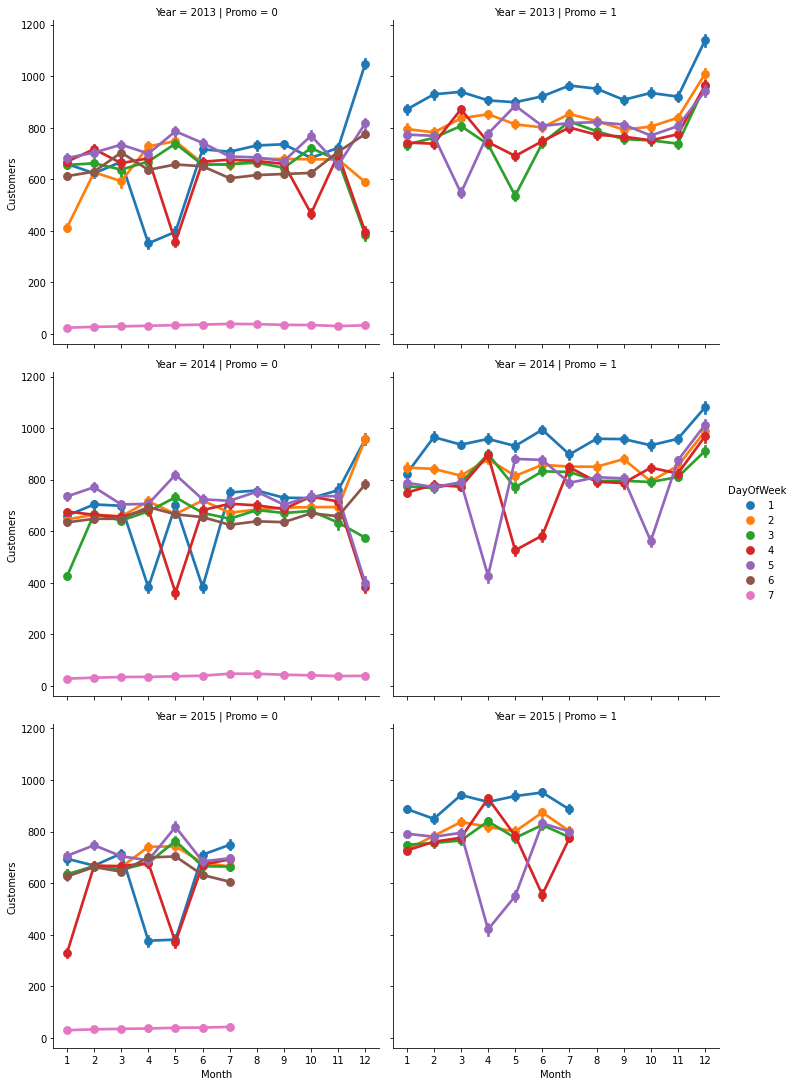

In [28]:
sns.catplot(data=train_df, x="Month", y="Customers",col='Promo',row="Year", hue='DayOfWeek', kind='point')
plt.savefig('../data/monthpromocat.png')


In [29]:
customer_promo_rln = train_df.loc[:, ['Customers', 'Promo']]
customer_promo_corr = customer_promo_rln.corr()
customer_promo_corr
#seaborn boxplot agg

,Customers,Promo
Customers,1.000000,0.316169
Promo,0.316169,1.000000


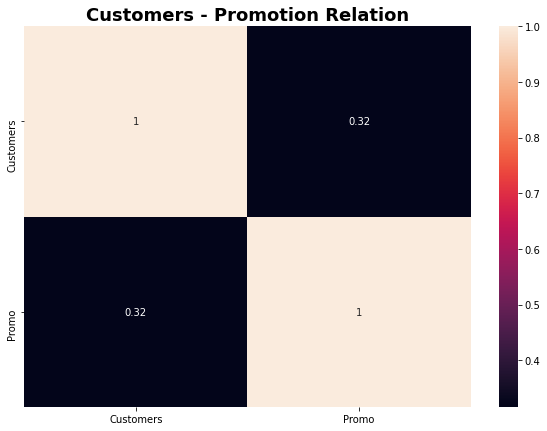

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(customer_promo_corr, annot=True)
plt.title('Customers - Promotion Relation', size=18, fontweight='bold')

plt.savefig('../data/custpromo.png')


### How does it affect already existing customers?

In [31]:
promo_customers_rln = train_df.loc[:,['Store','Customers','Promo','Sales']]
store_customer_difference = promo_customers_rln.groupby(['Store','Promo']).agg({'Customers':'mean','Sales':'mean'})
store_customer_difference


Customers         Sales
Store Promo                           
1     0       399.682131   3198.994845
      1       577.522222   5152.886111
2     0       366.876289   2855.058419
      1       678.702778   6172.816667
3     0       477.445017   3967.596220
...                  ...           ...
1113  1       754.250000   7320.086111
1114  0      2353.958763  14477.742268
      1      3165.383333  21601.497222
1115  0       297.800687   4082.221649
      1       457.122222   7073.266667

[2230 rows x 2 columns]

In [32]:
customer_value = store_customer_difference.Customers.values.tolist()
def get_average_increase_from_all_stores(grouped_cutomer_list:list) -> float:
    percentage_increase = []
    i = 0
    while(i < len(grouped_cutomer_list)):
        new_perc = ((grouped_cutomer_list[i+1] * 100) / grouped_cutomer_list[i]) - 100
        percentage_increase.append(new_perc)
        i += 2

    return percentage_increase,sum(percentage_increase) / len(percentage_increase)

increase_list, average_increase = get_average_increase_from_all_stores(customer_value)


In [33]:
#Average increase across all stores
print('The average customer increase across all stores due to promotion is by: {:.2%}'.format(average_increase/100))
results.add_data('averageincreaseacross', average_increase/100)


The average customer increase across all stores due to promotion is by: 62.18%


In [73]:
def change_list_type(change_list) -> list:
    new_list = []
    for i in change_list:
        new_list.append(int(i))

    return new_list

In [107]:
#Getting Per-Store Customer Increase
customer_info = train_df.loc[:, ['Store', 'Customers']]
customer_info = customer_info.groupby('Store').agg({'Customers':'mean'})
customer_info['Customer Percentage Increase'] = change_list_type(increase_list)
customer_info['Customers'] = customer_info['Customers'].apply(lambda x: int(x))
results.add_data('cuspercincrease', customer_info)
customer_info


,Customers,Customer Percentage Increase
Store,,
1,467,44
2,486,84
3,620,78
4,1100,45
5,444,95
...,...,...
1111,373,83
1112,693,77
1113,596,51


In [108]:
perc_increase_split = customer_info.sort_values('Customer Percentage Increase')
perc_increase_split['Store'] = perc_increase_split.index
max_value = max(perc_increase_split['Customer Percentage Increase'].values.tolist())
min_value = min(perc_increase_split['Customer Percentage Increase'].values.tolist())
bins = np.arange(min_value, max_value, 20)
perc_increase_plot_data = perc_increase_split.groupby(pd.cut(perc_increase_split["Customer Percentage Increase"], bins)).sum()


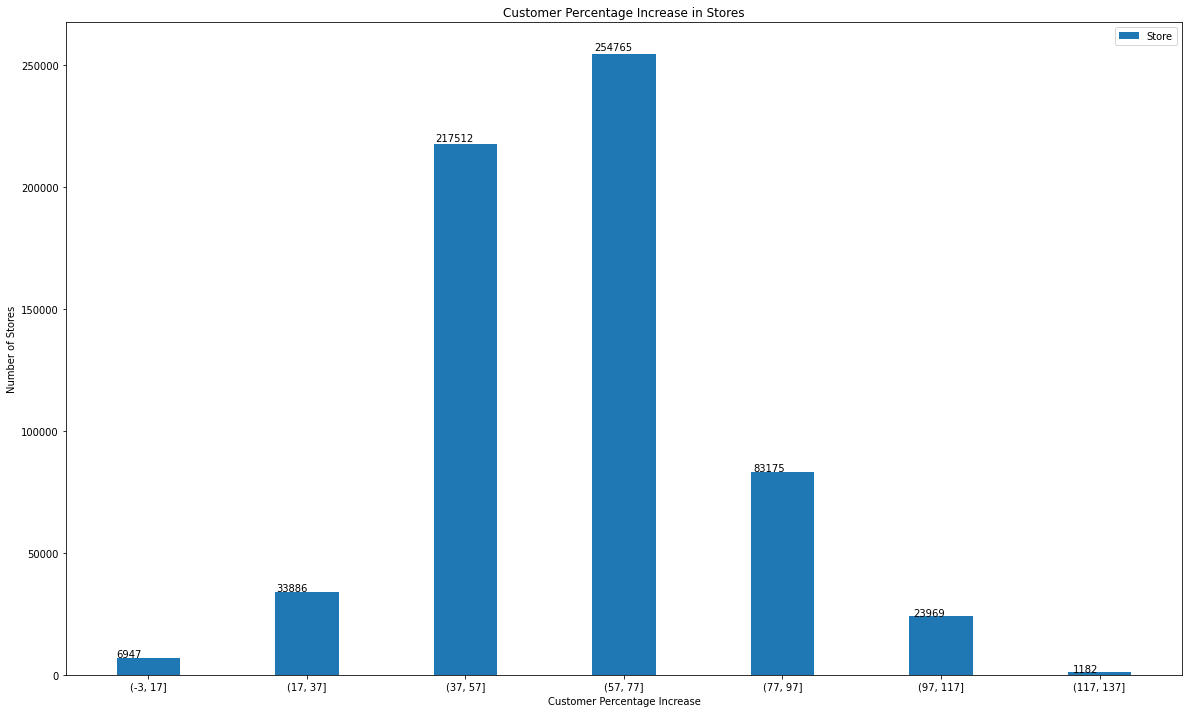

<Figure size 432x288 with 0 Axes>

In [109]:

X_axis = np.arange(len(perc_increase_plot_data.index))
plt.figure(figsize=(20, 12))
plt1 = plt.bar(X_axis, perc_increase_plot_data['Store'], 0.4, label='Store')
for p in plt1.patches:
    plt.annotate('{}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))
plt.xticks(X_axis, perc_increase_plot_data.index)
plt.xlabel("Customer Percentage Increase")
plt.ylabel("Number of Stores")
plt.title("Customer Percentage Increase in Stores")
plt.legend()
plt.show()

plt.savefig('../data/cuspercincreasediag.png')


In [110]:
# Top 10 Stores With high promotion customer success
top10 = customer_info.sort_values(
    by='Customer Percentage Increase', ascending=False)[:10]
results.add_data('top10promocust', top10)
top10


,Customers,Customer Percentage Increase
Store,,
198,280,149
607,343,131
575,405,119
271,655,117
635,494,115
1108,488,115
898,590,115
96,449,113
963,840,111


## 6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

### Checking based on store type

In [111]:
sns.catplot(data=joined_df, x="Month", y="Sales", hue='Promo',kind='point')

plt.savefig('../data/monthpromosales.png')

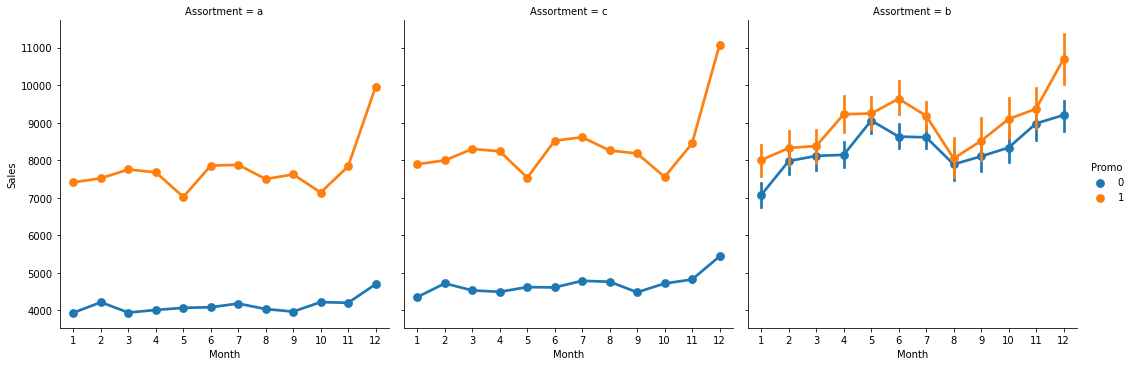

In [ ]:
sns.catplot(data=joined_df, x="Month", y="Sales", col='Assortment', hue='Promo', kind='point')

plt.savefig('../data/assortmenttype.png')


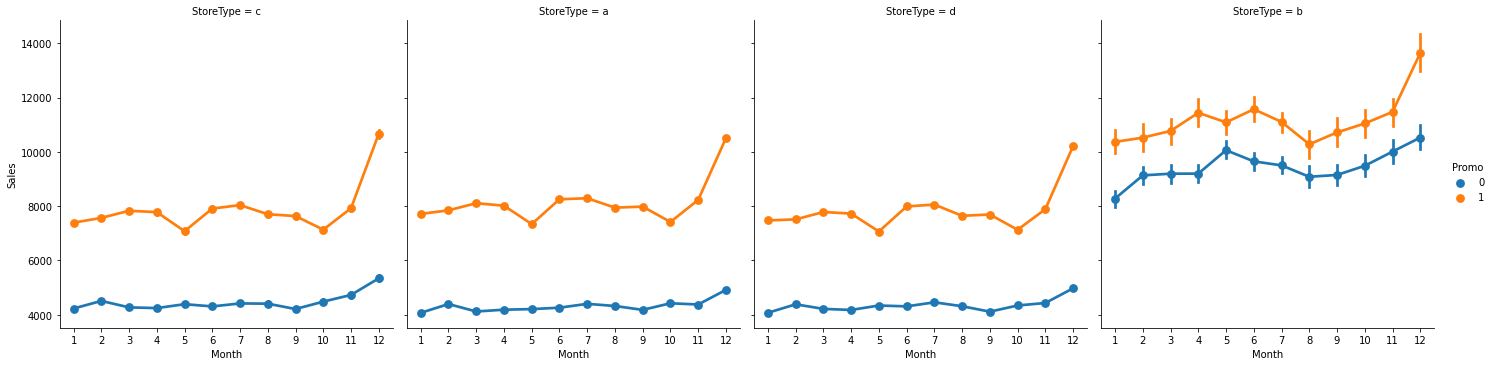

In [ ]:
sns.catplot(data=joined_df, x="Month", y="Sales",
            col='StoreType', hue='Promo', kind='point')

plt.savefig('../data/storetpye.png')


### Checking by percentage of increase

In [ ]:
# Promos are better deployed if they show a high percentage of increase
def get_increase_per_store(grouped_cutomer_list: list, profitable_promo:float=10) -> list:
    store_index = []
    i = 0
    while(i < len(grouped_cutomer_list)):
        new_perc = ((grouped_cutomer_list[i+1] * 100) / grouped_cutomer_list[i]) - 100
        if(new_perc >= profitable_promo):
            store_index.append(int(i/2))
        i += 2

    return store_index

In [ ]:
# Lets say its profitable if we get 10% increase in the mean customer amount
customers = train_df.loc[:, ['Store', 'Customers']]
customers = customers.groupby('Store').agg({'Customers': 'mean'})
store_index = get_increase_per_store(customer_value, profitable_promo=10)
store_10_perc_inc = customers[customers.index.isin(store_index)]
results.add_data('10percincrease', store_10_perc_inc)
store_10_perc_inc


,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1110,449.000000
1111,373.548832
1112,693.498938


In [ ]:
# Lets say its profitable if we get 60% increase in the mean customer amount
store_index = get_increase_per_store(customer_value, profitable_promo=60)
store_60_perc_inc = customers[customers.index.isin(store_index)]
results.add_data('60percincrease', store_60_perc_inc)
store_60_perc_inc


,Customers
Store,
1,467.646497
2,486.045648
4,1100.057325
5,444.360934
6,525.990446
...,...
1107,549.465699
1108,488.755839
1109,371.179420


In [ ]:
# Lets say its profitable if we get 90% increase in the mean customer amount
store_index = get_increase_per_store(customer_value, profitable_promo=120)
store_90_perc_inc = customers[customers.index.isin(store_index)]
results.add_data('90percincrease', store_90_perc_inc)
store_90_perc_inc


,Customers
Store,
197,701.006369
606,516.692144


## 7. Trends of customer behavior during store open and closing times

In [ ]:
customer_behaviour = train_df.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


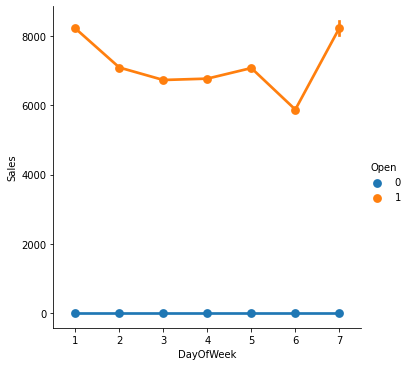

In [ ]:
sns.catplot(data=joined_df, x="DayOfWeek", y="Sales", hue="Open", kind='point')

plt.savefig('../data/dayofweeksales.png')

## 8. Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [ ]:
# open_all_weekdays = 
# all_week_stores = pd.DataFrame(train_df.groupby(['Store', 'DayOfWeek']).size().groupby(level=1).count(),columns=['Open For Week Days'])
# all_week_stores[all_week_stores['Open For Week Days'] == 5]
# all_week_stores
# train_df.groupby(['Store', 'DayOfWeek']).agg({'Sales':'mean'})


In [ ]:
# open to weekday relation ---- to do, promo to weekday
# open_all_weekdays (Mon - Fri)
# First Remove all holiday related days
holiday_out_df = train_df[train_df['StateHoliday'] == 0]
weekdays_df = holiday_out_df[holiday_out_df['DayOfWeek'] <= 5]
not_open_stores = weekdays_df[weekdays_df['Open'] == 0]
not_open_stores_id = not_open_stores['Store']
not_open_stores_id = not_open_stores_id.values.tolist()

all_weekdays_open_stores = train_df[~train_df['Store'].isin(not_open_stores_id)]
all_weekdays_open_stores
not_all_weekdays_open_stores = train_df[train_df['Store'].isin(not_open_stores_id)]

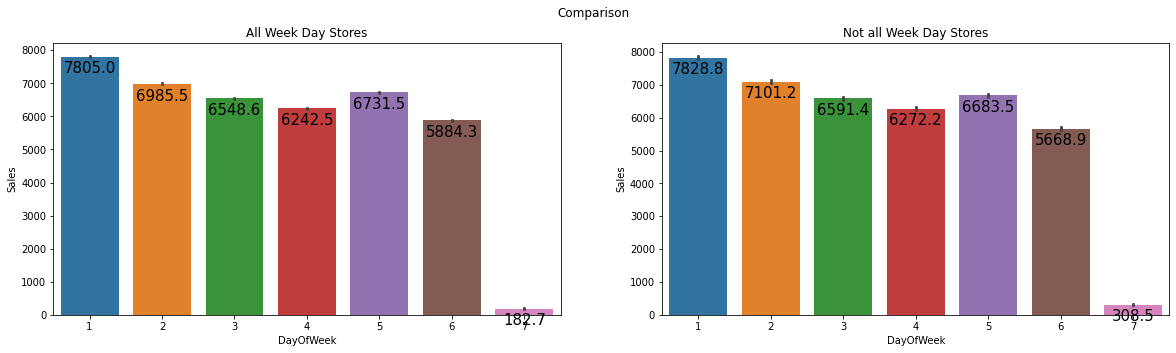

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison')
plot1 = sns.barplot(
    x='DayOfWeek', y='Sales', data=all_weekdays_open_stores, ax=axs[0])
plot1.set_title('All Week Day Stores')
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')

plot2 = sns.barplot(
    x='DayOfWeek', y='Sales', data=not_all_weekdays_open_stores, ax=axs[1])
plot2.set_title('Not all Week Day Stores')
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')

plt.savefig('../data/alldaycomp.png')

## 9. Check how the assortment type affects sales

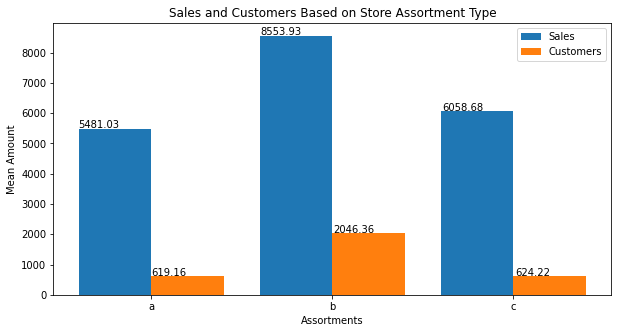

<Figure size 432x288 with 0 Axes>

In [ ]:
assortment_sales_rln = joined_df.loc[:, ['Assortment', 'Sales', 'Customers']]
assortment_sales_rln = assortment_sales_rln.groupby(
    "Assortment").agg({'Sales': 'mean', 'Customers': 'mean'})

X_axis = np.arange(len(assortment_sales_rln.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, assortment_sales_rln['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, assortment_sales_rln['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))

plt.xticks(X_axis, assortment_sales_rln.index)
plt.xlabel("Assortments")
plt.ylabel("Mean Amount")
plt.title("Sales and Customers Based on Store Assortment Type")
plt.legend()
plt.show()

plt.savefig('../data/storeassortmentclass.png')

## 10. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [ ]:
comp_dist_df = joined_df.loc[:, ['Store','Sales','Customers','CompetitionDistance']]
comp_dist_df = comp_dist_df.dropna()
comp_dist_df.shape

(1014567, 4)

In [ ]:
group_comp_dist = comp_dist_df.groupby('Store', as_index=False).median()
group_comp_dist

,Store,Sales,Customers,CompetitionDistance
0,1,4373.5,529.0,1270.0
1,2,4395.5,542.0,570.0
2,3,5892.0,705.0,14130.0
3,4,9062.0,1261.5,620.0
4,5,4180.0,537.0,29910.0
...,...,...,...,...
1107,1111,4614.0,431.0,1900.0
1108,1112,8707.0,755.0,1880.0
1109,1113,6018.5,675.5,9260.0
1110,1114,19556.5,3086.0,870.0


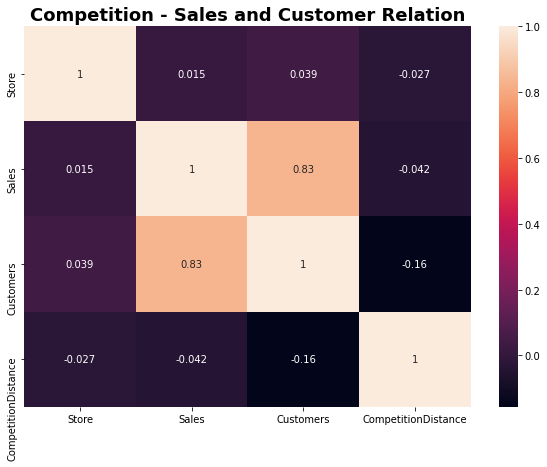

In [ ]:
group_comp_dist_corr = group_comp_dist.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(group_comp_dist_corr, annot=True)
plt.title('Competition - Sales and Customer Relation', size=18, fontweight='bold')

plt.savefig('../data/salescustcomprln.png')


## 11. How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [ ]:
open_close_df = joined_df.loc[:, ['Store', 'Sales', 'Customers', 'Month', 'Year',
                                 "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]
store_got_new_comp = open_close_df.loc[open_close_df['CompetitionOpenSinceMonth'].notnull()]

store_got_new_comp_cleaner = DataCleaner(store_got_new_comp)
store_got_new_comp_cleaner.change_columns_type_to(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], 'int64')
store_got_new_comp_cleaner.optimize_df()

store_got_new_comp = store_got_new_comp_cleaner.df
store_got_new_comp.shape

d:\10Academy\Week 3\pharmacy_sales_prediction\scripts\data_cleaner.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = self.df[col].astype(data_type)
d:\10Academy\Week 3\pharmacy_sales_prediction\scripts\data_cleaner.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = pd.to_numeric(
d:\10Academy\Week 3\pharmacy_sales_prediction\scripts\data_cleaner.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

(693861, 8)

In [ ]:
comp_store_opened_year = store_got_new_comp[store_got_new_comp['Year']
                                            <= store_got_new_comp['CompetitionOpenSinceYear']]

comp_store_opened_final = comp_store_opened_year[comp_store_opened_year['Month']
                                                 <= comp_store_opened_year['CompetitionOpenSinceMonth']]

comp_store_closed_year = store_got_new_comp[~(store_got_new_comp['Year']
                                              <= store_got_new_comp['CompetitionOpenSinceYear'])]

comp_store_closed_final = comp_store_closed_year.append(comp_store_opened_year[~(comp_store_opened_year['Month']
                                                                                 <= comp_store_opened_year['CompetitionOpenSinceMonth'])])

grouping_stores_after_store_open = comp_store_opened_final.groupby('Store').agg({'Sales':'median','Customers':'median'})
grouping_stores_before_store_open = comp_store_closed_final.groupby(
    'Store').agg({'Sales': 'median', 'Customers': 'median'})


In [ ]:
grouping_stores_after_store_open.columns = ['After Sales', 'After Customers']
grouping_stores_after_store_open['Before Sales'] = grouping_stores_before_store_open['Sales'][grouping_stores_before_store_open.index]
grouping_stores_after_store_open['Before Customers'] = grouping_stores_before_store_open['Customers'][grouping_stores_before_store_open.index]
grouping_stores_after_store_open

,After Sales,After Customers,Before Sales,Before Customers
Store,,,,
5,3942.0,516.0,4328.5,544.5
6,5975.0,731.0,4461.0,554.0
7,7060.5,826.0,8003.0,909.0
8,4567.5,606.0,5577.0,693.5
14,4944.0,624.0,5030.0,614.0
...,...,...,...,...
1085,6441.0,723.0,6775.0,724.0
1086,7949.0,916.0,5238.0,683.0
1094,4045.0,344.5,4145.0,345.0


In [ ]:
change_sales_customer_df = grouping_stores_after_store_open.copy(deep=True)
change_sales_customer_df['Change in Sales'] = change_sales_customer_df['After Sales'] - change_sales_customer_df['Before Sales']
change_sales_customer_df['Change in Customers'] = change_sales_customer_df['After Customers'] - change_sales_customer_df['Before Customers']
change_sales_customer_df.drop(['After Sales', 'Before Sales', 'After Customers', 'Before Customers'], axis=1, inplace=True)
results.add_data('newcompcomingeffect', change_sales_customer_df)
change_sales_customer_df


,Change in Sales,Change in Customers
Store,,
5,-386.5,-28.5
6,1514.0,177.0
7,-942.5,-83.0
8,-1009.5,-87.5
14,-86.0,10.0
...,...,...
1085,-334.0,-1.0
1086,2711.0,233.0
1094,-100.0,-0.5


In [ ]:
# Stores with decrease in sales and customers
decrease_sales_store = change_sales_customer_df[change_sales_customer_df['Change in Sales'] < 0]
decrease_customers_store = change_sales_customer_df[change_sales_customer_df['Change in Customers'] < 0]


In [ ]:
results.add_data('salesdecrease', decrease_sales_store)
decrease_sales_store


,Change in Sales,Change in Customers
Store,,
5,-386.5,-28.5
7,-942.5,-83.0
8,-1009.5,-87.5
14,-86.0,10.0
45,-118.5,-4.5
...,...,...
1053,-127.5,-14.5
1059,-90.0,8.5
1072,-26.5,-10.0


In [ ]:
results.add_data('custdecrease', decrease_customers_store)
decrease_customers_store


,Change in Sales,Change in Customers
Store,,
5,-386.5,-28.5
7,-942.5,-83.0
8,-1009.5,-87.5
45,-118.5,-4.5
47,-338.0,-8.0
...,...,...
1050,-392.5,-17.0
1053,-127.5,-14.5
1072,-26.5,-10.0


In [ ]:
# # Stores with increase in sales and customers
increase_sales_store = change_sales_customer_df[change_sales_customer_df['Change in Sales'] > 0]
increase_customers_store = change_sales_customer_df[change_sales_customer_df['Change in Customers'] > 0]


In [ ]:
results.add_data('salesincrease', increase_sales_store)
increase_sales_store


,Change in Sales,Change in Customers
Store,,
6,1514.0,177.0
28,413.0,72.5
30,690.5,137.0
33,592.0,47.0
37,261.5,40.5
...,...,...
1045,106.0,31.0
1075,174.5,34.5
1086,2711.0,233.0


In [ ]:
results.add_data('custincrease', increase_customers_store)
increase_customers_store


,Change in Sales,Change in Customers
Store,,
6,1514.0,177.0
14,-86.0,10.0
28,413.0,72.5
30,690.5,137.0
33,592.0,47.0
...,...,...
1059,-90.0,8.5
1075,174.5,34.5
1086,2711.0,233.0


In [ ]:
# joined_df = pd.merge(train_df, store_df, on=['Store'])

In [ ]:
# Save data as train.csv and add to dvc
# joined_df.to_csv('../data/train.csv')

In [ ]:
results.save_data('../data/exploration_info.pkl')